In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.transforms import v2

transformer_train = v2.Compose(
    [
        v2.Resize(size=(128, 128)),
        v2.RandomHorizontalFlip(1),
        v2.RandomRotation(degrees=30),
        v2.ColorJitter(
            brightness=0.3,
            contrast = 0.3,
            saturation = 0.3,
            hue=0.1,
        ),
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)
transformer_test = v2.Compose(
    [
        v2.Resize(size=(128, 128)),
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)

In [2]:
class UNGSUNG(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 32, 5, 1, 2)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.linear0 = nn.Linear(32768, 64)
        self.linear1 = nn.Linear(64, 1)
    def forward(self, inputs):
        x = F.relu(self.conv1(inputs))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.flatten(x)
        x = F.relu(self.linear0(x))
        outputs = F.sigmoid(self.linear1(x))
        return outputs

In [3]:
param_loaded = torch.load('ungsung_classifier_model.pth', weights_only=True)
model = UNGSUNG()
model.load_state_dict(param_loaded)

<All keys matched successfully>

RGB
0.7100492119789124


/var/folders/f4/dlc6vs952d9_s55nyfp4qb8r0000gn/T/ipykernel_4649/1757073213.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


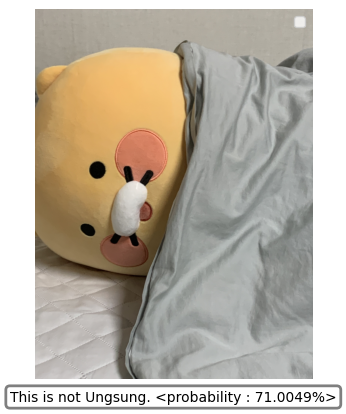

In [6]:
def visualize_test(image_path, prediction, pred):
    image = Image.open(image_path)
    image = ImageOps.exif_transpose(image)
    image = image.convert(mode='RGB')
    plt.imshow(image)
    plt.axis('off')
    plt.text(
        0.5, -0.03, f"{prediction} <probability : {pred*100:.4f}%>",
        fontsize=10, ha="center", va="top", transform=plt.gca().transAxes,
        bbox=dict(facecolor="white", alpha=0.5, boxstyle="round,pad=0.3", linewidth=2),
    )
    plt.legend()
    plt.show()
    
image_path = './ungsung_dataset/test/test_not2.jpeg'
image = Image.open(image_path)
print(image.mode)
image = image.convert(mode='RGB')
image_tensor = transformer_test(image).unsqueeze(0)
result = model(image_tensor)
print(result[0].item())
if result[0].item() > 0.8:
    prediction = "This is Ungsung."
else:
    prediction = "This is not Ungsung."

visualize_test(image_path, prediction, result[0].item())